# 1 DOWNLOAD THE DATASET

# 2 LOAD THE DATASET

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [21]:
info=pd.read_csv(r"D:\IBM\abalone.csv")

# 3 Perform Below Visualizations

# Univariate analysis

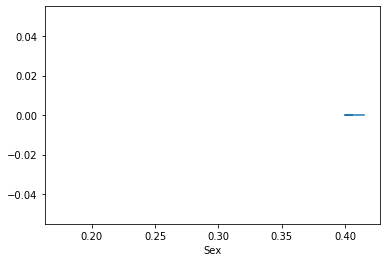

In [22]:
df_1=info.loc[info['Whole weight']==0.7775]
df_2=info.loc[info['Whole weight']==0.931]
df_3=info.loc[info['Whole weight']==0.07]
plt.plot(df_1['Diameter'],np.zeros_like(df_1['Diameter']))
plt.plot(df_2['Diameter'],np.zeros_like(df_2['Diameter']))
plt.plot(df_3['Diameter'],np.zeros_like(df_3['Diameter']))
plt.xlabel('Sex')
plt.show()

# Bi - Variate Analysis

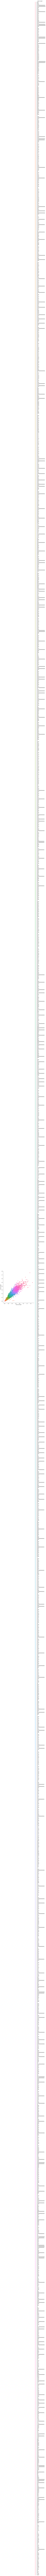

In [23]:
sns.FacetGrid(info,hue="Whole weight",size=7).map(plt.scatter,"Shucked weight","Viscera weight").add_legend();

# Multi-Variate Analysis

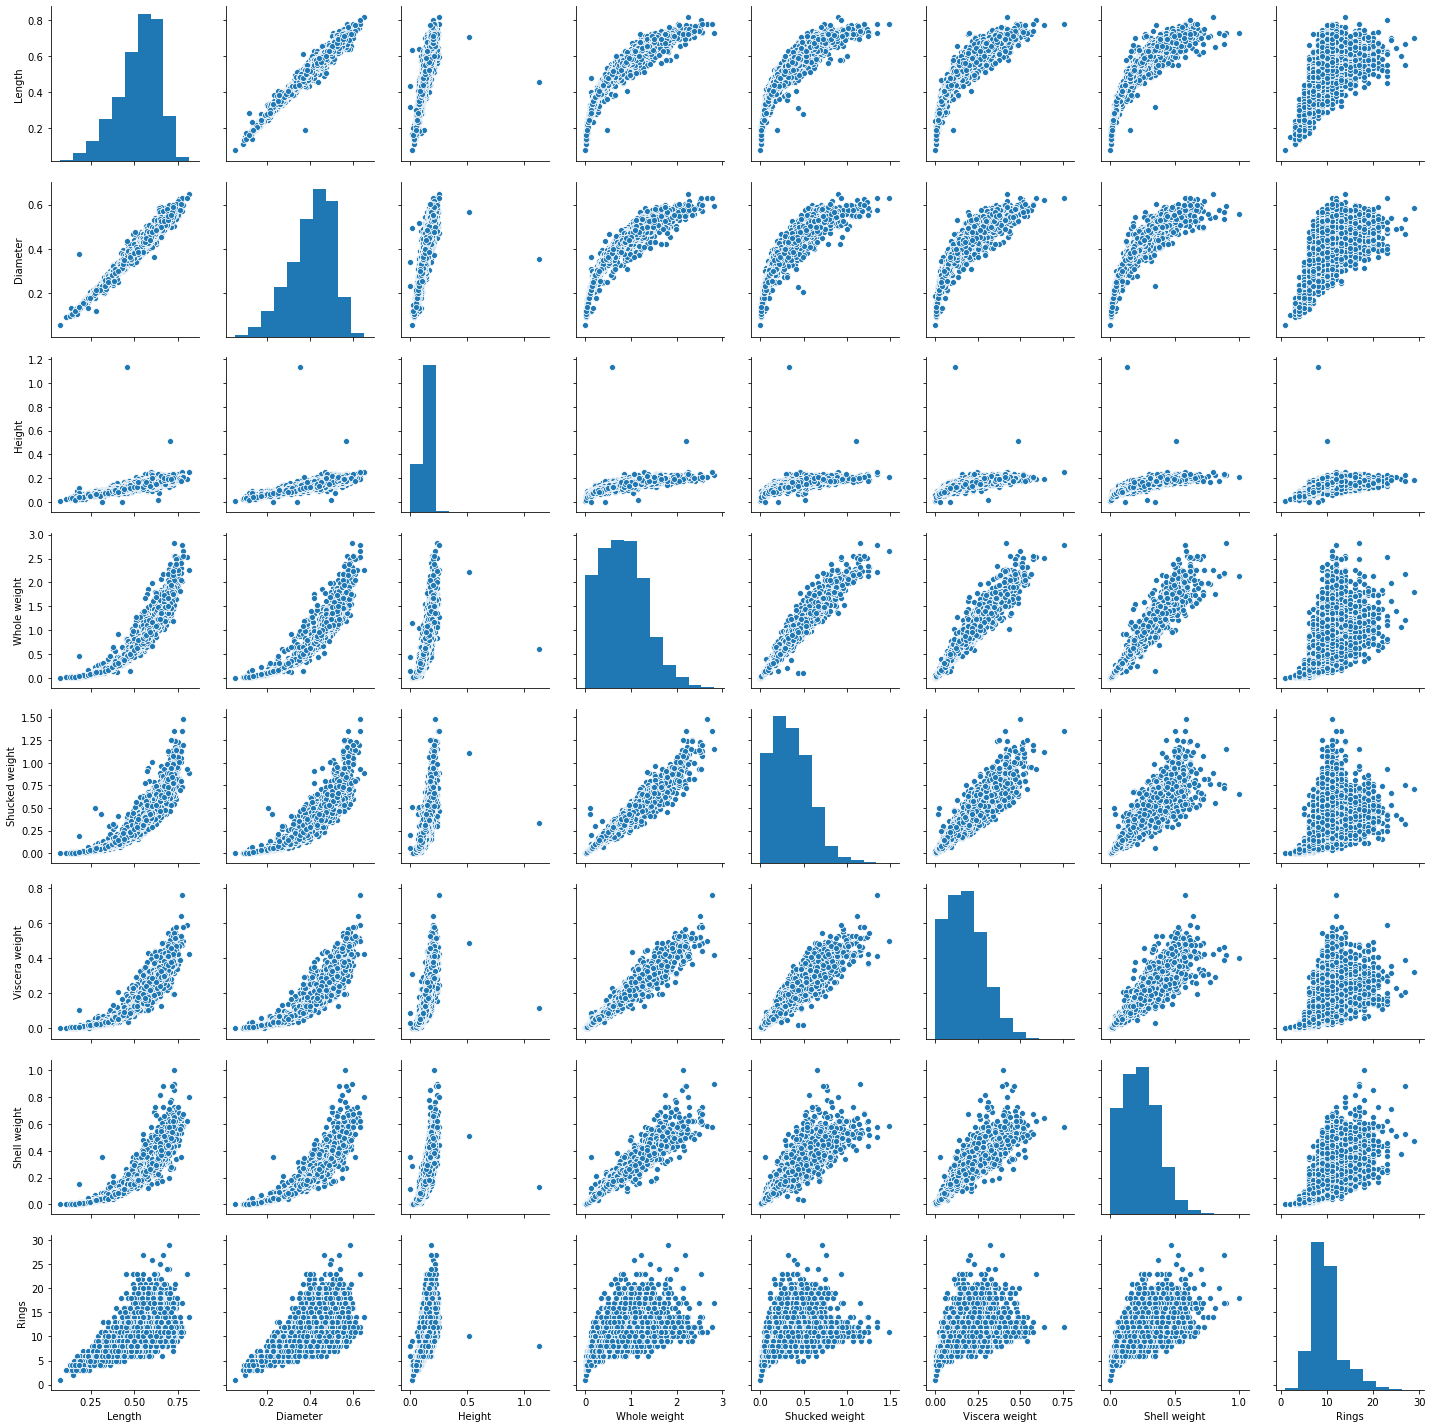

In [24]:
sns.pairplot(info)

# 4 Descriptive statistics

In [25]:
info.mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [26]:
info.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
info.median()

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [28]:
info.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64

# 5 Missing value


In [29]:
info.shape

(4177, 9)

In [30]:
info.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

# 6 outliers

In [47]:
sns.displot(info['Length'])

AttributeError: module 'seaborn' has no attribute 'displot'

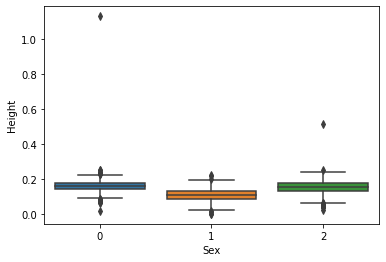

In [48]:
sns.boxplot(x='Sex',y='Height',data=info)

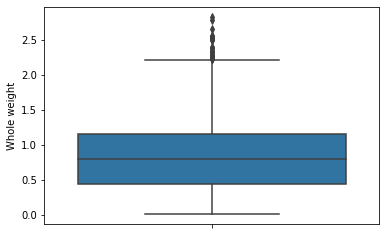

In [65]:
sns.boxplot(y='Whole weight',data=info)

# 7 Categorial Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
info.Sex = lab.fit_transform(info.Sex)
info.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 8 Split the data into dependent and independent variables

In [67]:
x=info.iloc[:,0:5]
y=info.iloc[:,7]
x
y


0       0.1500
1       0.0700
2       0.2100
3       0.1550
4       0.0550
         ...  
4172    0.2490
4173    0.2605
4174    0.3080
4175    0.2960
4176    0.4950
Name: Shell weight, Length: 4177, dtype: float64

# 9 Scale the independent variables

In [68]:
indep_var=info.iloc[0:,1:5].values
indep_var

array([[0.455 , 0.365 , 0.095 , 0.514 ],
       [0.35  , 0.265 , 0.09  , 0.2255],
       [0.53  , 0.42  , 0.135 , 0.677 ],
       ...,
       [0.6   , 0.475 , 0.205 , 1.176 ],
       [0.625 , 0.485 , 0.15  , 1.0945],
       [0.71  , 0.555 , 0.195 , 1.9485]])

In [69]:
dep_var=info.iloc[0:,6:].values
dep_var

array([[ 0.101 ,  0.15  , 15.    ],
       [ 0.0485,  0.07  ,  7.    ],
       [ 0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.2875,  0.308 ,  9.    ],
       [ 0.261 ,  0.296 , 10.    ],
       [ 0.3765,  0.495 , 12.    ]])

# 10 Split the data into training and testing

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(indep_var,dep_var,test_size=0.2,random_state=5)

In [71]:
x_train

array([[0.565 , 0.455 , 0.15  , 0.9595],
       [0.475 , 0.36  , 0.11  , 0.492 ],
       [0.64  , 0.525 , 0.2   , 1.3765],
       ...,
       [0.55  , 0.385 , 0.13  , 0.7275],
       [0.65  , 0.495 , 0.18  , 1.793 ],
       [0.59  , 0.475 , 0.145 , 0.9745]])

In [72]:
x_test

array([[0.43  , 0.33  , 0.095 , 0.34  ],
       [0.485 , 0.375 , 0.135 , 0.556 ],
       [0.71  , 0.55  , 0.17  , 1.614 ],
       ...,
       [0.625 , 0.505 , 0.215 , 1.4455],
       [0.385 , 0.3   , 0.09  , 0.308 ],
       [0.585 , 0.475 , 0.16  , 1.0505]])

In [73]:
y_train

array([[ 0.2395,  0.23  ,  9.    ],
       [ 0.11  ,  0.15  ,  8.    ],
       [ 0.3075,  0.47  , 16.    ],
       ...,
       [ 0.1625,  0.19  ,  8.    ],
       [ 0.339 ,  0.53  , 14.    ],
       [ 0.207 ,  0.259 , 10.    ]])

In [74]:
y_test

array([[ 0.085 ,  0.112 , 14.    ],
       [ 0.1315,  0.1685, 10.    ],
       [ 0.345 ,  0.45  , 11.    ],
       ...,
       [ 0.287 ,  0.435 , 22.    ],
       [ 0.056 ,  0.0835,  8.    ],
       [ 0.234 ,  0.285 , 10.    ]])

# 11 Build the Model

In [75]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [77]:
iris=datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [78]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
x=iris.data
y=iris.target
clf=RandomForestClassifier()
clf.fit(x,y)
clf.feature_importances_

C:\Users\IT DC LAB\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.05995736, 0.01046906, 0.43292837, 0.49664521])

In [81]:
clf.predict([[5.8, 2.7, 5.1, 1.9]])

array([2])

In [82]:
clf.predict_proba(x[[4]])

array([[1., 0., 0.]])

# 12 and 13 Train & Test the model

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
x_train,y_train

(array([[7.3, 2.9, 6.3, 1.8],
        [5.1, 2.5, 3. , 1.1],
        [5.8, 2.6, 4. , 1.2],
        [7.4, 2.8, 6.1, 1.9],
        [5.9, 3. , 5.1, 1.8],
        [6.4, 3.2, 4.5, 1.5],
        [5.8, 4. , 1.2, 0.2],
        [6.9, 3.1, 5.1, 2.3],
        [5.6, 2.7, 4.2, 1.3],
        [5. , 3.6, 1.4, 0.2],
        [6.5, 3.2, 5.1, 2. ],
        [6. , 2.7, 5.1, 1.6],
        [4.9, 3.1, 1.5, 0.1],
        [6.8, 3. , 5.5, 2.1],
        [4.8, 3. , 1.4, 0.3],
        [5.8, 2.7, 4.1, 1. ],
        [6.4, 2.9, 4.3, 1.3],
        [5.5, 4.2, 1.4, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [5.5, 2.5, 4. , 1.3],
        [4.8, 3.4, 1.6, 0.2],
        [6.7, 3.1, 4.4, 1.4],
        [6.3, 2.7, 4.9, 1.8],
        [6. , 3.4, 4.5, 1.6],
        [6.7, 2.5, 5.8, 1.8],
        [6.7, 3.1, 4.7, 1.5],
        [5.8, 2.7, 5.1, 1.9],
        [7.6, 3. , 6.6, 2.1],
        [5. , 3.5, 1.6, 0.6],
        [7. , 3.2, 4.7, 1.4],
        [5.8, 2.7, 5.1, 1.9],
        [4.6, 3.6, 1. , 0.2],
        [6. , 2.9, 4.5, 1.5],
        [6

In [84]:
x_test,y_test

(array([[5.7, 3.8, 1.7, 0.3],
        [6.3, 3.3, 6. , 2.5],
        [4.7, 3.2, 1.6, 0.2],
        [5.2, 4.1, 1.5, 0.1],
        [6. , 2.2, 4. , 1. ],
        [6.3, 3.3, 4.7, 1.6],
        [4.3, 3. , 1.1, 0.1],
        [6.2, 2.9, 4.3, 1.3],
        [5.1, 3.3, 1.7, 0.5],
        [5.5, 2.4, 3.8, 1.1],
        [4.4, 3.2, 1.3, 0.2],
        [5.2, 2.7, 3.9, 1.4],
        [6.7, 3.3, 5.7, 2.1],
        [5. , 3.4, 1.6, 0.4],
        [6.5, 3. , 5.2, 2. ],
        [6.9, 3.2, 5.7, 2.3],
        [4.9, 2.4, 3.3, 1. ],
        [5.8, 2.8, 5.1, 2.4],
        [5.3, 3.7, 1.5, 0.2],
        [6.7, 3.1, 5.6, 2.4],
        [5.7, 2.8, 4.1, 1.3],
        [5.1, 3.7, 1.5, 0.4],
        [6.1, 3. , 4.6, 1.4],
        [5.6, 3. , 4.1, 1.3],
        [5.7, 3. , 4.2, 1.2],
        [5.4, 3.9, 1.3, 0.4],
        [5. , 3. , 1.6, 0.2],
        [6.3, 2.5, 5. , 1.9],
        [7.9, 3.8, 6.4, 2. ],
        [7.7, 3. , 6.1, 2.3],
        [4.5, 2.3, 1.3, 0.3],
        [5.1, 3.4, 1.5, 0.2],
        [6.4, 2.7, 5.3, 1.9],
        [6

In [85]:
clf.predict([[5.6, 2.7, 4.2, 1.3]])

array([1])

In [86]:
clf.predict(x_test)

array([0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0,
       1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0,
       1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 1])

In [87]:
clf.score(x_test,y_test)

1.0

# 14 Measure the performance using Metrics.

In [88]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 7, max_features = 'sqrt',random_state = 18, criterion = 'gini').fit(x_train, y_train)
prediction = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction, labels = [1,0])


array([[25,  0],
       [ 0, 29]], dtype=int64)

In [89]:
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(y_test,prediction)

0.9466666666666667